
**Student name**:Dinah Ayitso

**Student pace**: Full-time Remote

**Scheduled project review date/time**: 28/03/2025

**Instructor name**:Lewis Kamindu/Diana Mongina

#  Aviation Accident Analysis  
---
## Introduction  
**This notebook explores aviation accident data to uncover trends, risk factors, to give insights on the best parctices to minimize operation risks for the business.** 


## Objectives 

### 1. Accident Frequency Analysis  
- Which **aircraft makes and models** have the highest and lowest number of accidents?  
- How does the **severity** of accidents vary across different aircraft?  

### 2. Purpose of Flight Analysis  
- What is the **number of accidents per flight purpose**?  
- Which **flight purposes** experience the most and least severe accidents?  

### 3. Geographical Analysis  
- Which **airports** have recorded the highest and lowest number of accidents?  
- What are the most affected **locations** based on latitude and longitude?  
- How do accidents **cluster on a map**?  

### 4. Weather & Engine Analysis  
- How do different **weather conditions** impact accident frequency?  
- Does the **number of engines** affect the likelihood of an accident?  

### 5. Flight Phase Analysis  
- During which **phases of flight** do most accidents occur?  
- Which flight phases have the highest accident severity?  

### 6.Time-Based Trends  
- How have accident numbers **changed over the years**?  
- Do accidents follow a **seasonal pattern across months**?  

---

##  Data Cleaning & Preparation 
 
* Handling missing values  
* Extracting relevant columns for analysis  
* Converting data types for analysis  
* Standardizing categorical data  

---

## Data Visualization  
To effectively analyze trends and patterns, multiple visualization techniques are used:  
 **Bar charts** for accident counts  
 **Stacked bar charts** for severity comparisons  
 **Scatter plots** for geographical analysis  
 **Line graphs** for time-based trends  
  
---

## Conclusion & Insights  
**At the end of the analysis, key findings will be summarized, providing actionable insights for aviation safety and risk assessment** 







# Data Preparation and analysis
**In this section ,we shall load our data and drive some insights from the data for further analysis**

**Ishall import pandas ,matplotlib and numpy for our analysis**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# load the raw Aviation Data
df=pd.read_csv("AviationData.csv")
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 5: invalid continuation byte

In [3]:
#The above error happens because Pandas is trying to read a CSV file encoded in a format that is not UTF-8.
# Modify your read_csv() command to include the encoding parameter

df = pd.read_csv("AviationData.csv", encoding="latin1", low_memory=False)


df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# find the data info (summary statistics of the data type in the data frame)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
df.dtypes # types of data in the data set

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [6]:
# identify categorical and numerical daata then describe
# numerical Data
numerical_cols=df.select_dtypes(include=['int64',"float64"]).columns
print(f"Numerical Columns:",numerical_cols)
# categorical data
df_categorical_cols=df.select_dtypes(include=["object"]).columns
print(f"categorical columns:",df_categorical_cols)

Numerical Columns: Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured'],
      dtype='object')
categorical columns: Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')


In [7]:
# Handling values in numerical cols

df = pd.read_csv("AviationData.csv", encoding="latin1", low_memory=False)

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median()) # fill missing values with the median 
df[numerical_cols]


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1.0,2.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,1.0
3,1.0,2.0,0.0,0.0,0.0
4,1.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...
88884,1.0,0.0,1.0,0.0,0.0
88885,1.0,0.0,0.0,0.0,0.0
88886,1.0,0.0,0.0,0.0,1.0
88887,1.0,0.0,0.0,0.0,0.0


In [8]:
# use outliers method to remove outliers from the numerical columns  data 
Q3=df[numerical_cols].quantile(0.75)
Q1=df[numerical_cols].quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
df_cleaned = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)][numerical_cols]
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)
df_cleaned.head()



Original dataset shape: (88889, 31)
Cleaned dataset shape: (40231, 5)


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
7,1.0,0.0,0.0,0.0,2.0
10,1.0,0.0,0.0,0.0,1.0
11,1.0,0.0,0.0,0.0,1.0
16,1.0,0.0,0.0,0.0,1.0
18,1.0,0.0,0.0,0.0,1.0


In [9]:
#cleaned data from numerical coulmns
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40231 entries, 7 to 88887
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number.of.Engines       40231 non-null  float64
 1   Total.Fatal.Injuries    40231 non-null  float64
 2   Total.Serious.Injuries  40231 non-null  float64
 3   Total.Minor.Injuries    40231 non-null  float64
 4   Total.Uninjured         40231 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [10]:
#describing the cleaned numerical data set
df_cleaned.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,40231.0,40231.0,40231.0,40231.0,40231.000000
mean,1.0,0.0,0.0,0.0,1.647113
std,0.0,0.0,0.0,0.0,0.919519
min,1.0,0.0,0.0,0.0,0.000000
25%,1.0,0.0,0.0,0.0,1.000000
50%,1.0,0.0,0.0,0.0,1.000000
75%,1.0,0.0,0.0,0.0,2.000000
max,1.0,0.0,0.0,0.0,5.000000


In [11]:
# exploring categorical data
df[df_categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Event.Id               88889 non-null  object
 1   Investigation.Type     88889 non-null  object
 2   Accident.Number        88889 non-null  object
 3   Event.Date             88889 non-null  object
 4   Location               88837 non-null  object
 5   Country                88663 non-null  object
 6   Latitude               34382 non-null  object
 7   Longitude              34373 non-null  object
 8   Airport.Code           50249 non-null  object
 9   Airport.Name           52790 non-null  object
 10  Injury.Severity        87889 non-null  object
 11  Aircraft.damage        85695 non-null  object
 12  Aircraft.Category      32287 non-null  object
 13  Registration.Number    87572 non-null  object
 14  Make                   88826 non-null  object
 15  Model              

In [12]:
# cleaning the categorical data

# Select categorical columns 
df_categorical = df[['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 
                     'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 
                     'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 
                     'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'FAR.Description', 'Schedule', 
                     'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 
                     'Report.Status', 'Publication.Date']].copy()  # Copy to avoid modifying original df

# Step 1: Convert All Text to Lowercase
df_categorical = df_categorical.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Step 2: Handle Missing Values
cols_to_fill = ['Location', 'Country', 'Airport.Name', 'Injury.Severity', 
                'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
                'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight']

df_categorical[cols_to_fill] = df_categorical[cols_to_fill].fillna('unknown')

# Convert Latitude & Longitude to numeric, fill missing with 0
df_categorical['Latitude'] = pd.to_numeric(df_categorical['Latitude'], errors='coerce').fillna(0)
df_categorical['Longitude'] = pd.to_numeric(df_categorical['Longitude'], errors='coerce').fillna(0)

# Step 3: Drop Irrelevant Columns
df_categorical.drop(columns=['Event.Id', 'Accident.Number', 'Publication.Date', 
                             'Amateur.Built', 'FAR.Description', 'Air.carrier', 
                             'Schedule', 'Report.Status', 'Airport.Code'], inplace=True)

# Step 4: Convert Categorical Columns to Category Type
df_categorical = df_categorical.astype('category')

print("Cleaned categorical dataset shape:", df_categorical.shape)
df_categorical.head()




Cleaned categorical dataset shape: (88889, 17)


,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight
0,accident,1948-10-24,"moose creek, id",united states,0.000000,0.000000,unknown,fatal(2),destroyed,unknown,nc6404,stinson,108-3,reciprocating,personal,unk,cruise
1,accident,1962-07-19,"bridgeport, ca",united states,0.000000,0.000000,unknown,fatal(4),destroyed,unknown,n5069p,piper,pa24-180,reciprocating,personal,unk,unknown
2,accident,1974-08-30,"saltville, va",united states,36.922223,-81.878056,unknown,fatal(3),destroyed,unknown,n5142r,cessna,172m,reciprocating,personal,imc,cruise
3,accident,1977-06-19,"eureka, ca",united states,0.000000,0.000000,unknown,fatal(2),destroyed,unknown,n1168j,rockwell,112,reciprocating,personal,imc,cruise
4,accident,1979-08-02,"canton, oh",united states,0.000000,0.000000,unknown,fatal(1),destroyed,unknown,n15ny,cessna,501,unknown,personal,vmc,approach


In [13]:
# exploring the c ategorical and numerical data before concatinating 
print("df_cleaned index range:", df_cleaned.index.min(), "-", df_cleaned.index.max())
print("df_categorical index range:", df_categorical.index.min(), "-", df_categorical.index.max())


df_cleaned index range: 7 - 88887
df_categorical index range: 0 - 88888


In [14]:
df_cleaned = df_cleaned.reset_index(drop=True)
df_categorical = df_categorical.reset_index(drop=True)


In [15]:
# concatinating categorical and numerical data for further analysis
df_final = pd.concat([df_cleaned, df_categorical], axis=1)

print("Final dataset shape:", df_final.shape)
df_final.head()
# save the cleaned data
df_final.to_csv("aviation_accidents_cleaned.csv", index=False)



Final dataset shape: (88889, 22)


In [16]:
# find the summary statistics of the data
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Number.of.Engines       40231 non-null  float64 
 1   Total.Fatal.Injuries    40231 non-null  float64 
 2   Total.Serious.Injuries  40231 non-null  float64 
 3   Total.Minor.Injuries    40231 non-null  float64 
 4   Total.Uninjured         40231 non-null  float64 
 5   Investigation.Type      88889 non-null  category
 6   Event.Date              88889 non-null  category
 7   Location                88889 non-null  category
 8   Country                 88889 non-null  category
 9   Latitude                88889 non-null  category
 10  Longitude               88889 non-null  category
 11  Airport.Name            88889 non-null  category
 12  Injury.Severity         88889 non-null  category
 13  Aircraft.damage         88889 non-null  category
 14  Aircraft.Category     

# ANALYSIS
---
# 1. Accident Frequency Analysis
* Which aircraft makes and models have the highest and lowest number of accidents?
* How does the severity of accidents vary across different aircraft models amd makes?

In [17]:
# Analyzing the number of make with the hughest and lowest number of accidents 
number_of_accidents_per_make=df_final["Make"].value_counts() 
top_10_accident_makes=df_final['Make'].value_counts().head(10)
least_10_accident_makes=df_final["Make"].value_counts().tail(10)
print(f"number of accidents per make:",number_of_accidents_per_make)
print(f"Makes with highest accident counts:",top_10_accident_makes)
print(f"Makes with least accident counts:",least_10_accident_makes)


number of accidents per make: cessna                           27149
piper                            14870
beech                             5372
boeing                            2745
bell                              2722
                                 ...  
mooney aircraft corp                 1
mooney aircraft corporation          1
mooney airplane company, inc.        1
mooney international corp            1
107.5 flying corporation             1
Name: Make, Length: 7587, dtype: int64
Makes with highest accident counts: cessna      27149
piper       14870
beech        5372
boeing       2745
bell         2722
mooney       1334
robinson     1230
grumman      1172
bellanca     1045
hughes        932
Name: Make, dtype: int64
Makes with least accident counts: monroig pedro j                  1
monte clark                      1
moody-siple                      1
moon                             1
mooney aircraft                  1
mooney aircraft corp             1
mooney aircraft c

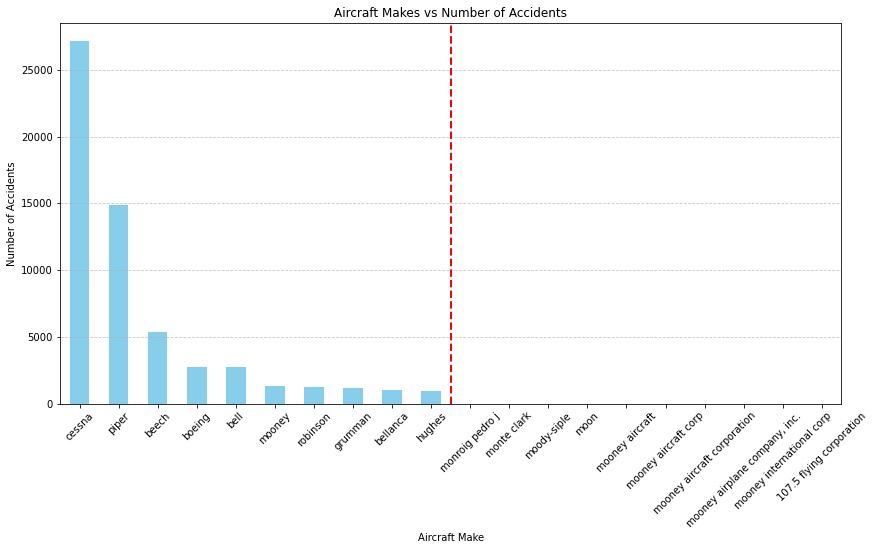

In [18]:
# visualization 
combined_make_data=pd.concat([top_10_accident_makes,least_10_accident_makes])
# Plot the combined data
plt.figure(figsize=(14,7))
combined_make_data.plot(kind='bar', color='skyblue')
plt.axvline(x=9.5, color='red', linestyle='--', linewidth=2, label='Demarcation Line')

plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.title('Aircraft Makes vs Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [19]:
# finding injury severity for different makes 
# columns that will be used are Total.Minor.Injuries, Total.Serious.Injuries and make 
injury_severity_per_make=df_final.groupby("Make")[["Total.Minor.Injuries","Total.Serious.Injuries","Total.Uninjured"]].sum()
top_10_injury_severity_per_make=injury_severity_per_make.sort_values(by=["Total.Minor.Injuries","Total.Serious.Injuries",
                                                                "Total.Uninjured"],ascending=False).head(10)
botom_10_injury_severity_per_make=injury_severity_per_make.sort_values(by=["Total.Minor.Injuries","Total.Serious.Injuries",
                                                                "Total.Uninjured"],ascending=True).head(10)
injury_severity_per_make
print(f"Highest makes with injury severity:",top_10_injury_severity_per_make)
print(f"Lowest makes with injury severity:",botom_10_injury_severity_per_make)



Highest makes with injury severity:            Total.Minor.Injuries  Total.Serious.Injuries  Total.Uninjured
Make                                                                    
cessna                      0.0                     0.0          23358.0
piper                       0.0                     0.0          12729.0
beech                       0.0                     0.0           4327.0
bell                        0.0                     0.0           2098.0
grumman                     0.0                     0.0           1499.0
boeing                      0.0                     0.0           1298.0
mooney                      0.0                     0.0           1026.0
bellanca                    0.0                     0.0            981.0
hughes                      0.0                     0.0            859.0
schweizer                   0.0                     0.0            619.0
Lowest makes with injury severity:                           Total.Minor.Injuries  Total

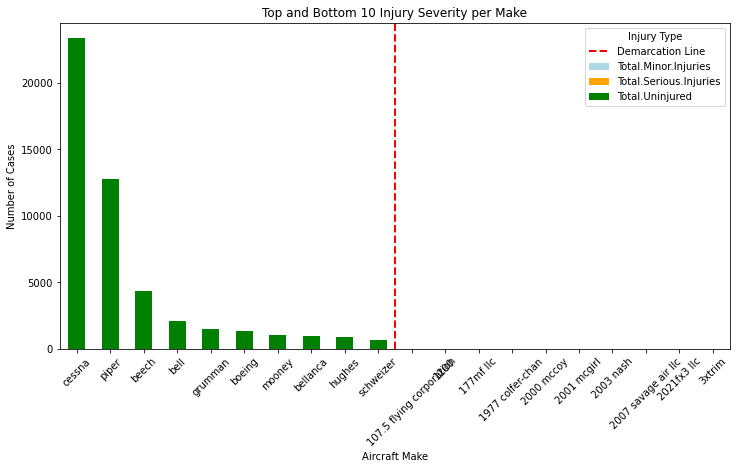

In [20]:
combined_make_data= pd.concat([top_10_injury_severity_per_make,botom_10_injury_severity_per_make])


combined_make_data.plot(kind='bar', stacked=True, figsize=(12,6), color=['lightblue', 'orange', 'green'])
plt.axvline(x=9.5, color='red', linestyle='--', linewidth=2, label='Demarcation Line')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Cases')
plt.title('Top and Bottom 10 Injury Severity per Make')
plt.xticks(rotation=45)
plt.legend(title="Injury Type")
plt.show()

In [21]:
# Comparinumber different models with highest and lowest accidents and accident severity

number_of_accidents_per_model=df_final["Model"].value_counts() 
top_10_accident_models=df_final['Model'].value_counts().head(10)
least_10_accident_models=df_final["Model"].value_counts().tail(10)
print(f"number of accidents per model:",number_of_accidents_per_model)
print(f"Models with highest accident counts:",top_10_accident_models)
print(f"Models with least accident counts:",least_10_accident_models)


number of accidents per model: 152          2367
172          1756
172n         1164
pa-28-140     932
150           829
             ... 
l60             1
la 1            1
la 4            1
la 4 200        1
&gcbc           1
Name: Model, Length: 11646, dtype: int64
Models with highest accident counts: 152          2367
172          1756
172n         1164
pa-28-140     932
150           829
172m          798
172p          689
182           659
180           622
150m          585
Name: Model, dtype: int64
Models with least accident counts: l382e-44k-20       1
l382g (c-130)      1
l3b                1
l4 experimental    1
l53                1
l60                1
la 1               1
la 4               1
la 4 200           1
&gcbc              1
Name: Model, dtype: int64


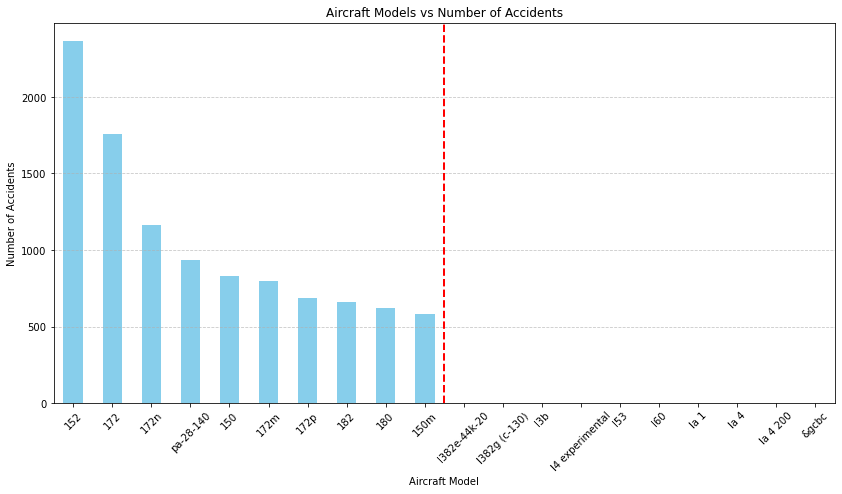

In [22]:
combined_model_data=pd.concat([top_10_accident_models,least_10_accident_models])
# Plot the combined data
plt.figure(figsize=(14,7))
combined_model_data.plot(kind='bar', color='skyblue')
plt.axvline(x=9.5, color='red', linestyle='--', linewidth=2, label='Demarcation Line')

plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.title('Aircraft Models vs Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [23]:
# finding injury severity for different modesl
# columns that will be used are Total.Minor.Injuries, Total.Serious.Injuries and model 
injury_severity_per_model=df_final.groupby("Model")[["Total.Minor.Injuries","Total.Serious.Injuries","Total.Uninjured"]].sum()
top_10_injury_severity_per_model=injury_severity_per_model.sort_values(by=["Total.Minor.Injuries","Total.Serious.Injuries",
                                                                "Total.Uninjured"],ascending=False).head(10)
botom_10_injury_severity_per_model=injury_severity_per_model.sort_values(by=["Total.Minor.Injuries","Total.Serious.Injuries",
                                                                "Total.Uninjured"],ascending=True).head(10)
injury_severity_per_model
print(f"Highest models with injury severity:",top_10_injury_severity_per_model)
print(f"Lowest models with injury severity:",botom_10_injury_severity_per_model)


Highest models with injury severity:            Total.Minor.Injuries  Total.Serious.Injuries  Total.Uninjured
Model                                                                   
152                         0.0                     0.0           2720.0
172                         0.0                     0.0           1278.0
172n                        0.0                     0.0           1051.0
pa-28-140                   0.0                     0.0            942.0
150                         0.0                     0.0            890.0
150m                        0.0                     0.0            644.0
172m                        0.0                     0.0            639.0
pa-38-112                   0.0                     0.0            610.0
172p                        0.0                     0.0            598.0
g-164a                      0.0                     0.0            572.0
Lowest models with injury severity:                       Total.Minor.Injuries  Total.S

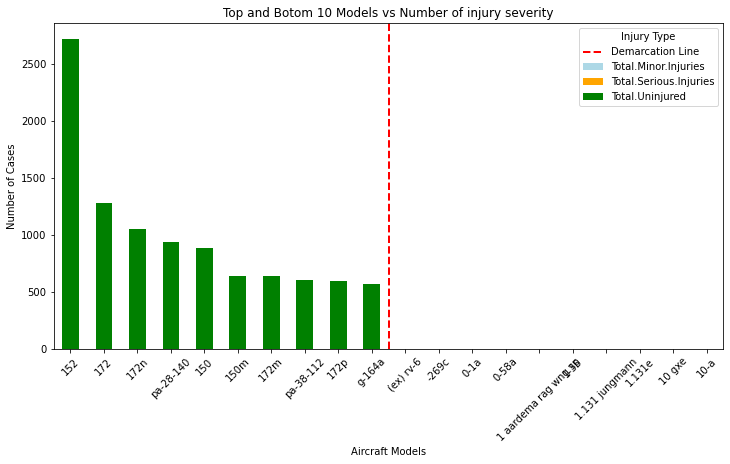

In [24]:
# visualizng for number of injury severity vs Makes
combined_model_data= pd.concat([top_10_injury_severity_per_model,botom_10_injury_severity_per_model])


combined_model_data.plot(kind='bar', stacked=True, figsize=(12,6), color=['lightblue', 'orange', 'green'])
plt.axvline(x=9.5, color='red', linestyle='--', linewidth=2, label='Demarcation Line')
plt.xlabel('Aircraft Models')
plt.ylabel('Number of Cases')
plt.title('Top and Botom 10 Models vs Number of injury severity')
plt.xticks(rotation=45)
plt.legend(title="Injury Type")
plt.show()

# 2. Purpose of Flight Analysis
* What is the number of accidents per flight purpose?
* Which flight purposes experience the most and least severe accidents?

In [25]:
#purpose of flight analyisis
number_of_accidents_flight_purpose=df_final['Purpose.of.flight'].value_counts()
top_10_highest_flight_purpose=df_final["Purpose.of.flight"].value_counts().head(10)
lowest_10_highest_flight_purpose=df_final["Purpose.of.flight"].value_counts().tail(10)
print(f"number of accident count per flight purpose:",number_of_accidents_flight_purpose)
print(f"top 10 highest flight purpose:",top_10_highest_flight_purpose)
print(f"least 10 flight purpose:",lowest_10_highest_flight_purpose)



number of accident count per flight purpose: personal                     49448
unknown                      12994
instructional                10601
aerial application            4712
business                      4018
positioning                   1646
other work use                1264
ferry                          812
aerial observation             794
public aircraft                720
executive/corporate            553
flight test                    405
skydiving                      182
external load                  123
public aircraft - federal      105
banner tow                     101
air race show                   99
public aircraft - local         74
public aircraft - state         64
air race/show                   59
glider tow                      53
firefighting                    40
air drop                        11
asho                             6
pubs                             4
publ                             1
Name: Purpose.of.flight, dtype: int64
top 10 

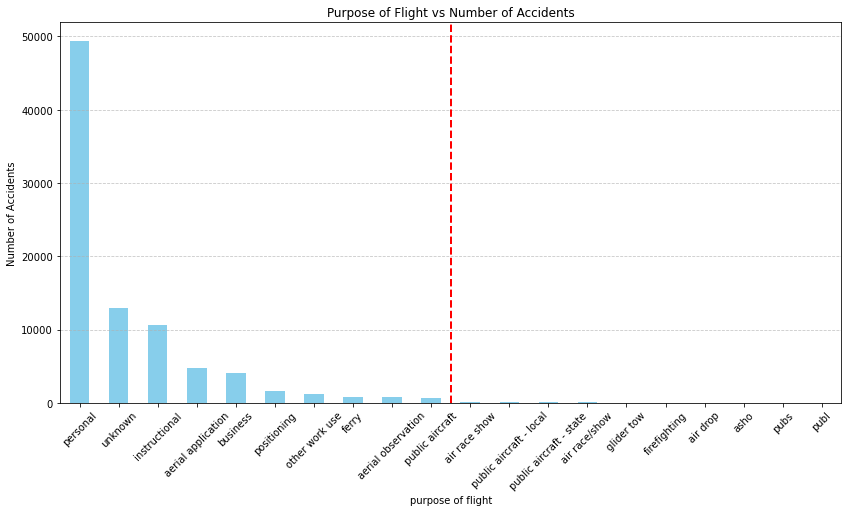

In [26]:
combined_flight_purpose_data=pd.concat([top_10_highest_flight_purpose,lowest_10_highest_flight_purpose])
plt.figure(figsize=(14,7))
combined_flight_purpose_data.plot(kind='bar', color='skyblue')
plt.axvline(x=9.5, color='red', linestyle='--', linewidth=2, label='Demarcation Line')

plt.xlabel('purpose of flight')
plt.ylabel('Number of Accidents')
plt.title('Purpose of Flight vs Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [27]:
# comparing injury severity with purpose of flight
# finding injury severity for different makes 
# columns that will be used are Total.Minor.Injuries, Total.Serious.Injuries and purpose of flight 
injury_severity_per_flight_purpose=df_final.groupby("Purpose.of.flight")[["Total.Minor.Injuries","Total.Serious.Injuries","Total.Uninjured"]].sum()
top_10_injury_severity_flight_purpose=injury_severity_per_flight_purpose.sort_values(by=["Total.Minor.Injuries","Total.Serious.Injuries",
                                                                "Total.Uninjured"],ascending=False).head(10)
botom_10_injury_severity_flight_purpose=injury_severity_per_flight_purpose.sort_values(by=["Total.Minor.Injuries","Total.Serious.Injuries",
                                                                "Total.Uninjured"],ascending=True).head(10)
injury_severity_per_flight_purpose
print(f"Highest flight purpose with injury severity:",top_10_injury_severity_flight_purpose)
print(f"Lowest flight purpose with injury severity:",botom_10_injury_severity_flight_purpose)



Highest flight purpose with injury severity:                      Total.Minor.Injuries  Total.Serious.Injuries  \
Purpose.of.flight                                                   
personal                              0.0                     0.0   
unknown                               0.0                     0.0   
instructional                         0.0                     0.0   
business                              0.0                     0.0   
aerial application                    0.0                     0.0   
positioning                           0.0                     0.0   
ferry                                 0.0                     0.0   
other work use                        0.0                     0.0   
executive/corporate                   0.0                     0.0   
public aircraft                       0.0                     0.0   

                     Total.Uninjured  
Purpose.of.flight                     
personal                     37375.0  
unknown  

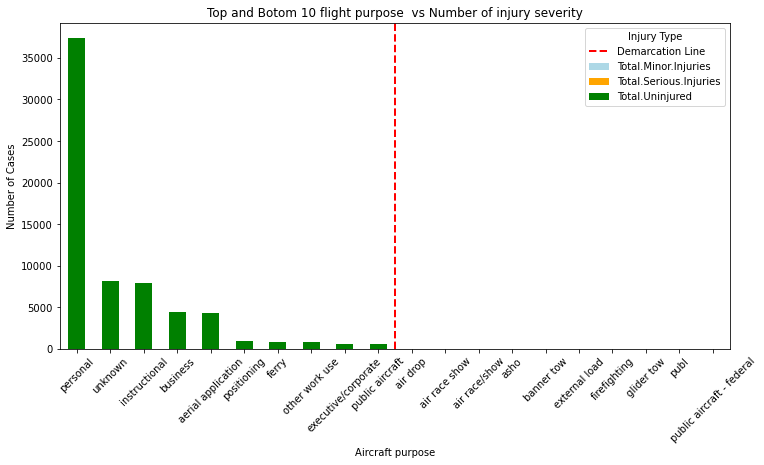

In [28]:
# visualizing purpse of flight withinjury severity
combined_purpose_flight_severity_data=pd.concat([top_10_injury_severity_flight_purpose,botom_10_injury_severity_flight_purpose]) 
combined_purpose_flight_severity_data.plot(kind='bar', stacked=True, figsize=(12,6), color=['lightblue', 'orange', 'green'])

plt.axvline(x=9.5, color='red', linestyle='--', linewidth=2, label='Demarcation Line')
plt.xlabel('Aircraft purpose')
plt.ylabel('Number of Cases')
plt.title('Top and Botom 10 flight purpose  vs Number of injury severity')
plt.xticks(rotation=45)
plt.legend(title="Injury Type")
plt.show()



# 3.Geographical Analysis
* Which airports have recorded the highest and lowest number of accidents?
* What are the most affected locations based on latitude and longitude?
* How do accidents cluster on a map?

top ten accident prone airports: unknown             36175
private               471
private airstrip      266
none                  232
private strip         161
merrill field         109
centennial            102
van nuys               97
north las vegas        82
municipal              78
Name: Airport.Name, dtype: int64
bottom ten accident prone airports: miller farm                  1
miller creek                 1
miller - sparta airport      1
miller "pvt"                 1
milledgeville                1
millar airport               1
mill creek strip             1
milhan airport               1
milford municipal airport    1
(grass strip)                1
Name: Airport.Name, dtype: int64


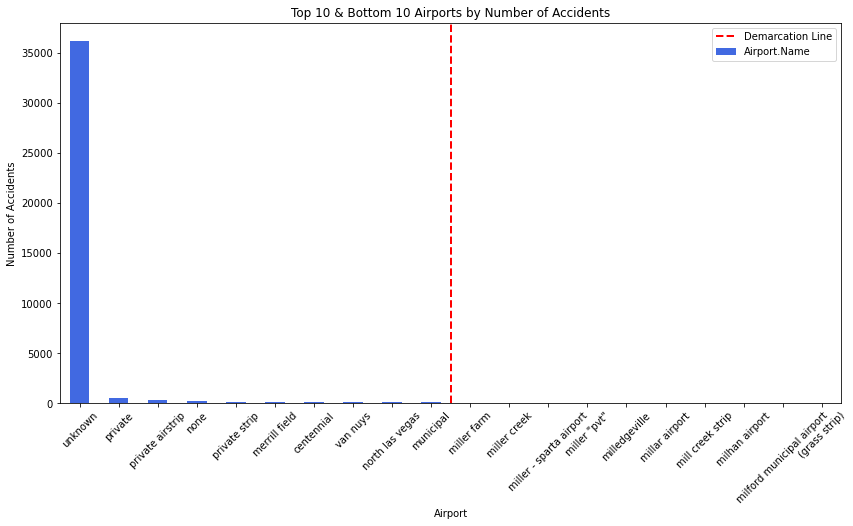

In [29]:


# Count accidents per airport
accidents_per_airport = df_final['Airport.Name'].value_counts()

# Get top 10 and bottom 10 airports
top_10_airports = accidents_per_airport.head(10)
bottom_10_airports = accidents_per_airport.tail(10)
print(F"top ten accident prone airports:",top_10_airports)
print(F"bottom ten accident prone airports:",bottom_10_airports)


# Combine for visualization
combined_airports = pd.concat([top_10_airports, bottom_10_airports])

# Plot the data
plt.figure(figsize=(14,7))
combined_airports.plot(kind='bar', color='royalblue')

# Add demarcation line
plt.axvline(x=9.5, color='red', linestyle='--', linewidth=2, label='Demarcation Line')

# Labels and title
plt.xlabel('Airport')
plt.ylabel('Number of Accidents')
plt.title('Top 10 & Bottom 10 Airports by Number of Accidents')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()


top ten accident prone locations: anchorage, ak      548
miami, fl          275
houston, tx        271
albuquerque, nm    265
chicago, il        256
fairbanks, ak      246
phoenix, az        224
denver, co         196
tucson, az         196
atlanta, ga        189
Name: Location, dtype: int64
bottom ten accident prone locations: monterey, tn                 1
monterey, ma                 1
monterey, la                 1
monterey park, ca            1
montello, wi                 1
montello, nv                 1
montego bay, jamaica         1
montecristi, las americas    1
montecito, ca                1
(n) skwentna, ak             1
Name: Location, dtype: int64


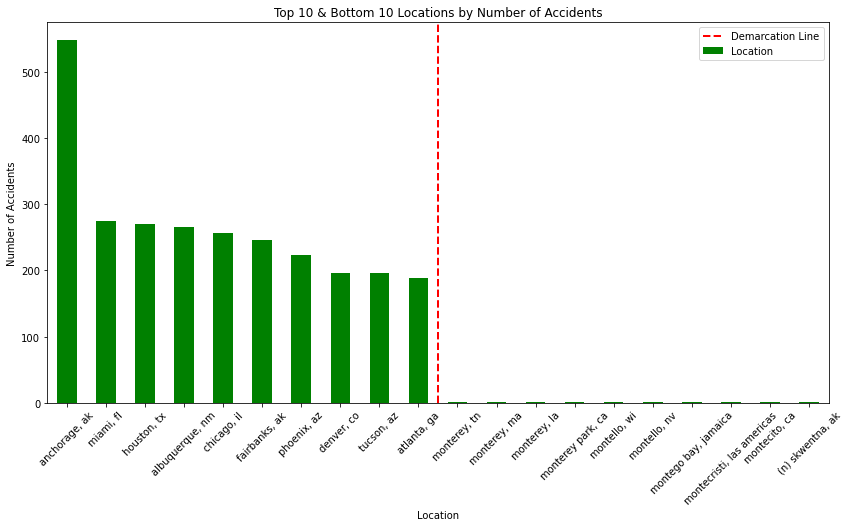

In [30]:
# Count accidents per location
accidents_per_location = df_final['Location'].value_counts()

# Get top 10 and bottom 10 locations
top_10_locations = accidents_per_location.head(10)
bottom_10_locations = accidents_per_location.tail(10)
print(f"top ten accident prone locations:",top_10_locations)
print(f"bottom ten accident prone locations:",bottom_10_locations)


# Combine for visualization
combined_locations = pd.concat([top_10_locations, bottom_10_locations])

# Plot the data
plt.figure(figsize=(14,7))
combined_locations.plot(kind='bar', color='green')

# Add demarcation line
plt.axvline(x=9.5, color='red', linestyle='--', linewidth=2, label='Demarcation Line')

# Labels and title
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.title('Top 10 & Bottom 10 Locations by Number of Accidents')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_final['Longitude'], df_final['Latitude'], alpha=0.5, color='red', marker='o')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Aviation Accidents')
plt.grid(True)

plt.show()


# 4 Weather & Engine Analysis
* How do different weather conditions impact accident frequency?
* Does the number of engines affect the likelihood of an accident?


In [ ]:
# wheather conditions 
import matplotlib.pyplot as plt

# Count accidents per weather condition
weather_accidents = df_final['Weather.Condition'].value_counts()

# Plot the data
plt.figure(figsize=(14,7))
weather_accidents.plot(kind='bar', color='teal')

# Add demarcation line


# Labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Weather conditions vs number of Accidents')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()


In [ ]:
# Number of engines
# Count accidents per number of engines
engine_accidents = df_final['Engine.Type'].value_counts()
print(f" Number of engine per type:",engine_accidents)


# Plot the data
plt.figure(figsize=(14,7))
engine_accidents.plot(kind='bar', color='purple')

# Add demarcation li

# Labels and title
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.title('Number of engines vs Accidents')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()


# 5.Flight Phase Analysis
* During which phases of flight do most accidents occur?
* Which flight phases have the highest accident severity?

In [ ]:
# Broad of flight phase
# Count accidents per broad phase of flight
flight_phase_accidents = df_final['Broad.phase.of.flight'].value_counts()
print(f"Number of Accidents per broad phase of flight:",flight_phase_accidents)

# Combine for visualization


# Plot the data
plt.figure(figsize=(14,7))
flight_phase_accidents.plot(kind='bar', color='purple')


# Labels and title
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.title('Broad phase of flight vs Accidents')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()


# 6.Time based Accident Trends

* How have accident numbers changed over the years?
* Do accidents follow a seasonal pattern across months?

In [ ]:

# convert event.date to datetime
df_final['Event.Date'] = pd.to_datetime(df_final['Event.Date'])

# Extract year and month into new columns
df_final['Year'] = df_final['Event.Date'].dt.year
df_final['Month'] = df_final['Event.Date'].dt.month



In [ ]:


# Count number of accidents per year
accidents_per_year = df_final['Year'].value_counts().sort_index()
print(f"number of accidents per year:",accidents_per_year )

# Plot using Seaborn with a regression (trend) line
plt.figure(figsize=(12,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='b', label="Accident Count")
# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Aviation Accident Trends Over the Years (with Trend Line)')
plt.grid(True)

# Show plot
plt.show()


In [ ]:
# Count number of accidents per month
accidents_per_month = df_final['Month'].value_counts().sort_index()

# Plot accident trends over months using a normal line graph
plt.figure(figsize=(10,5))
plt.plot(accidents_per_month.index, accidents_per_month.values, marker='o', linestyle='-', color='orange', label="Accident Count")

# Labels and title
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Aviation Accident Trends Over the Months')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.legend()

# Show plot
plt.show()


### **Conclusions and Recommendations from Aviation Accident Analysis**

## **Conclusions**

1. **Most Accident-Prone Aircraft Makes and Models:**
   - **Cessna (27,149 accidents), Piper (14,870 accidents), and Beech (5,372 accidents)** account for the highest number of accidents.
   - The **Cessna 152, 172, and 172N models** are the most accident-prone, with accident counts of 2,367, 1,756, and 1,164, respectively.
   - These aircraft are widely used for personal, instructional, and general aviation, which may contribute to the high accident rates.

2. **Flight Purpose and Accident Trends:**
   - **Personal flights (49,448 accidents)** dominate accident occurrences, followed by **unknown (12,994) and instructional flights (10,601).**
   - Business flights and aerial applications also contribute significantly to the total accident count.
   - Low-accident categories include air races, firefighting, and glider towing, likely due to strict regulations and limited flight frequency.

3. **Geographic and Airport-Based Insights:**
   - **Anchorage, AK (548 accidents), Miami, FL (275), and Houston, TX (271)** have the highest accident occurrences.
   - **Unknown airports and private airstrips** report the most accidents, indicating possible gaps in safety infrastructure and air traffic control at smaller airports.

4. **Engine Type and Accident Distribution:**
   - **Reciprocating engines (69,530 accidents)** are linked to the most accidents, likely due to their widespread use in small aircraft.
   - **Turbojet and electric-powered aircraft have relatively low accident counts**, suggesting that modern propulsion systems may have better safety performance.

5. **Broad Phase of Flight and Accidents:**
   - The **highest number of accidents occur during landing (15,428), takeoff (12,493), and cruise (10,269).**
   - These phases are critical in flight safety and require improved monitoring and pilot training.

6. **Historical Trends:**
   - The highest accident rates were recorded between **1982 and 2000**, with a peak in 1982 (3,593 accidents).
   - A **steady decline in accidents post-2000** suggests improvements in aviation safety standards, technology, and pilot training.

---

## **Recommendations for Setting Up an Aviation Business**

1. **Choosing the Right Aircraft Fleet:**
   - Avoid aircraft models with **historically high accident rates** unless additional safety measures are implemented.
   - Consider modern aircraft with **better safety records** and advanced avionics.
   - If using **Cessna or Piper aircraft**, implement **rigorous maintenance and pilot training programs**.

2. **Focusing on a Safe Business Model:**
   - If setting up a **flight training school**, prioritize **aircraft with high safety ratings** and enforce strict instructor-to-student supervision.
   - For **air charter services**, use aircraft equipped with **advanced safety features** like AI-assisted navigation and real-time tracking.
   - Aerial application (crop dusting) businesses should focus on **pilot training** and **weather monitoring systems** to minimize risks.

3. **Selecting a Safe Location & Infrastructure:**
   - If operating from a **private airstrip**, invest in **runway lighting, weather monitoring, and communication systems** to reduce accident risks.
   - Setting up near **controlled airports with ATC supervision** improves safety and reduces mid-air collisions.
   - Avoid locations with **historically high accident rates**, unless safety improvements are in place.

4. **Implementing High Safety Standards:**
   - Regularly inspect and maintain aircraft, focusing on **reciprocating engine safety checks**.
   - Use **predictive maintenance technology** to detect engine issues before failures occur.
   - Provide **annual safety training for pilots and ground crew** to reinforce emergency protocols.

